In [33]:
from utils import read_ultimate_dataset
all_dataset = read_ultimate_dataset("./datasets/ultimate-dataset", ["text", "label", "type"], {"type" : [0,1,2,3,4]})

In [34]:
abstracts = [t["text"] for t in all_dataset]
labels = [t["type"] for t in all_dataset]

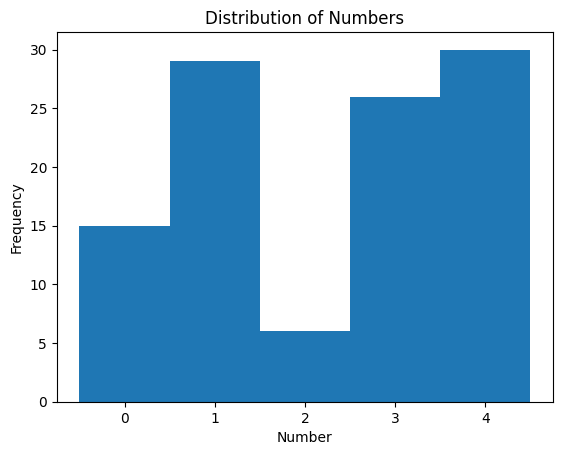

In [19]:
import matplotlib.pyplot as plt


plt.hist(labels, bins=range(min(labels), max(labels)+2), align='left')
plt.xlabel('Number')
plt.ylabel('Frequency')
plt.title('Distribution of Numbers')
plt.show()


In [35]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-mpnet-base-v2')

In [36]:
embeddings = model.encode(abstracts)

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Assuming embeddings and labels are your dataset
embeddings = np.array(embeddings)  # Convert list to NumPy array if not already
labels = np.array(labels)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(embeddings, labels, test_size=0.2, random_state=42)

# Step 4: Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Train the SVM with a linear kernel
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Step 6: Predict and evaluate the model
y_pred = svm_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.3181818181818182
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.33      0.33      0.33         6
           2       0.00      0.00      0.00         0
           3       0.33      0.12      0.18         8
           4       0.33      0.60      0.43         5

    accuracy                           0.32        22
   macro avg       0.30      0.28      0.27        22
weighted avg       0.36      0.32      0.31        22



/Users/sebmora/miniconda3/envs/ai/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sebmora/miniconda3/envs/ai/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sebmora/miniconda3/envs/ai/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Assuming embeddings and labels are in Python lists
embeddings = np.array(embeddings)
labels = np.array(labels)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(embeddings, labels, test_size=0.2, random_state=42)

# Step 4: Train the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of trees
rf_model.fit(X_train, y_train)

# Step 5: Predict and evaluate the model
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.36363636363636365
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.20      0.33      0.25         6
           3       0.40      0.25      0.31         8
           4       0.57      0.80      0.67         5

    accuracy                           0.36        22
   macro avg       0.29      0.35      0.31        22
weighted avg       0.33      0.36      0.33        22



/Users/sebmora/miniconda3/envs/ai/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sebmora/miniconda3/envs/ai/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sebmora/miniconda3/envs/ai/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(embeddings, labels, test_size=0.2, random_state=42)

In [6]:
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset

# Create dataset
train_data = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.long))
test_data = TensorDataset(torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.long))

# Data loaders
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

# Neural network model
class PlagiarismClassifier(nn.Module):
    def __init__(self):
        super(PlagiarismClassifier, self).__init__()
        self.fc1 = nn.Linear(768, 128)  # MPNet-base output is 768 dimensions
        self.fc2 = nn.Linear(128, 5)    # Output layer for 5 classes

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = PlagiarismClassifier()


In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch in range(100):  # run for more epochs depending on convergence
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')


Epoch 1, Loss: 1.9827661514282227
Epoch 2, Loss: 0.8981560468673706
Epoch 3, Loss: 1.694929599761963
Epoch 4, Loss: 1.119644045829773
Epoch 5, Loss: 0.777195394039154
Epoch 6, Loss: 0.8808457851409912
Epoch 7, Loss: 0.5776621103286743
Epoch 8, Loss: 0.6376609206199646
Epoch 9, Loss: 1.063429355621338
Epoch 10, Loss: 0.5651378035545349
Epoch 11, Loss: 0.7469958066940308
Epoch 12, Loss: 0.6622048020362854
Epoch 13, Loss: 0.6166098117828369
Epoch 14, Loss: 1.4902065992355347
Epoch 15, Loss: 0.9208400249481201
Epoch 16, Loss: 0.6094833612442017
Epoch 17, Loss: 0.21876153349876404
Epoch 18, Loss: 0.5490304231643677
Epoch 19, Loss: 0.43068990111351013
Epoch 20, Loss: 0.46315062046051025
Epoch 21, Loss: 0.33998414874076843
Epoch 22, Loss: 0.5740800499916077
Epoch 23, Loss: 0.15140476822853088
Epoch 24, Loss: 0.16565342247486115
Epoch 25, Loss: 0.17809803783893585
Epoch 26, Loss: 0.2244567722082138
Epoch 27, Loss: 0.2591806650161743
Epoch 28, Loss: 0.20760250091552734
Epoch 29, Loss: 0.2177106

In [9]:
model.eval()  # set the model to evaluation mode
with torch.no_grad():
    correct = 0
    total = 0
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy: {100 * correct / total}%')


Accuracy: 36.36363636363637%
